In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
star_wars=pd.read_csv('Guided Project_ Star Wars Survey/star_wars.csv', encoding='ISO-8859-1')


In [53]:
#star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [18]:
#star_wars[['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
#       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
#       'Unnamed: 14']].head()

#star_wars[['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
#       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
#       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
#       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
#       'Unnamed: 28']].head()

#star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [312]:
#Changing the names of the columns to make them immediately understandable.

star_wars.rename({'RespondentID':'ID', 'Have you seen any of the 6 films in the Star Wars franchise?':'seen_any_movie',
                 'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan', 
                 'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_ep1',
                 'Unnamed: 4':'seen_ep2', 'Unnamed: 5':'seen_ep3', 'Unnamed: 6':'seen_ep4', 'Unnamed: 7':'seen_ep5',
                 'Unnamed: 8':'seen_ep6', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank(1-6)_ep1',
                 'Unnamed: 10':'rank(1-6)_ep2', 'Unnamed: 11':'rank(1-6)_ep3', 'Unnamed: 12':'rank(1-6)_ep4', 'Unnamed: 13':'rank(1-6)_ep5', 'Unnamed: 14':'rank(1-6)_ep6',
                 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'relation_w_han',
                 'Unnamed: 16':'relation_w_luke', 'Unnamed: 17':'relation_w_leia', 'Unnamed: 18':'relation_w_anakin', 'Unnamed: 19':'relation_w_obi',
                 'Unnamed: 20':'relation_w_palpatine', 'Unnamed: 21':'relation_w_vader', 'Unnamed: 22':'relation_w_lando', 'Unnamed: 23':'relation_w_boba',
                 'Unnamed: 24':'relation_w_c-3p0', 'Unnamed: 25':'relation_w_r2d2', 'Unnamed: 26':'relation_w_jarjar', 'Unnamed: 27':'relation_w_padme',
                 'Unnamed: 28':'relation_w_yoda', 'Which character shot first?':'who_shot_first', 'Are you familiar with the Expanded Universe?':'familiar_w_exp_uni',
                 'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦':'exp_uni_fan', 'Do you consider yourself to be a fan of the Star Trek franchise?':'star_trek_fan',
                 'Gender':'gender', 'Age':'age', 'Household Income':'household_income', 'Education':'education','Location (Census Region)':'location'},axis=1,inplace=True)

In [99]:
#star_wars.head()

,ID,seen_any_movie,fan,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,rank(1-6)_ep1,...,relation_w_yoda,who_shot_first,familiar_w_exp_uni,exp_uni_fan,star_trek_fan,gender,age,household_income,education,location
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [313]:
#We are excluding the first row which is an empty row.

star_wars=star_wars.drop(0,axis=0)
star_wars.head()

,ID,seen_any_movie,fan,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,rank(1-6)_ep1,...,relation_w_yoda,who_shot_first,familiar_w_exp_uni,exp_uni_fan,star_trek_fan,gender,age,household_income,education,location
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [235]:
#The columns 'seen_any_movie'/'fan'/'seen_ep1/6' have Yes/No and NaN answers, we are converting those answers to True/False
#because it is easier to work with them later in the process.

corrections={'Yes':True, 'No':False}
corrections_1={'Male':'M', 'Female':'F'}
#print(star_wars['seen_any_movie'].dtypes)
#print(star_wars['fan'].dtypes)
cols=['seen_any_movie','fan','familiar_w_exp_uni','exp_uni_fan','star_trek_fan']
for i in cols:
    star_wars[i]=star_wars[i].map(corrections)
star_wars['gender']=star_wars['gender'].map(corrections_1)


titles=['Star Wars: Episode I  The Phantom Menace','Star Wars: Episode II  Attack of the Clones',
       'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope',
       'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']
seen=['seen_ep1','seen_ep2','seen_ep3','seen_ep4','seen_ep5','seen_ep6']

for c in range(6):
    corrections_2={titles[c]:True, np.nan:False}
    star_wars[seen[c]]=star_wars[seen[c]].map(corrections_2)
star_wars.head()

,ID,seen_any_movie,fan,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,rank(1-6)_ep1,...,relation_w_yoda,who_shot_first,familiar_w_exp_uni,exp_uni_fan,star_trek_fan,gender,age,household_income,education,location
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,M,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,M,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,M,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,False,NaN,True,M,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,True,False,False,M,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


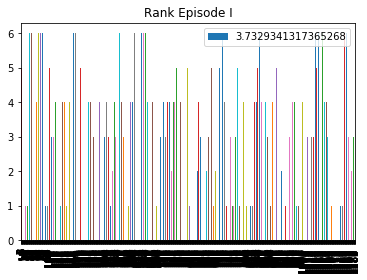

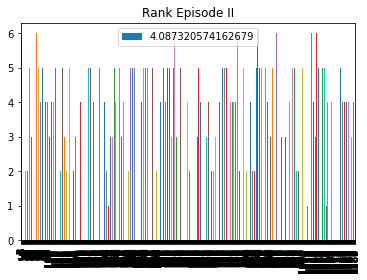

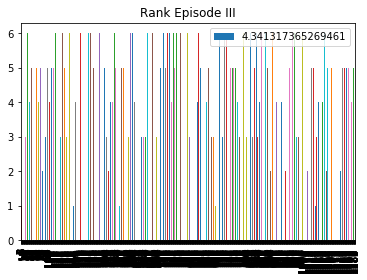

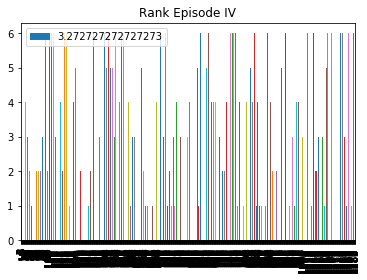

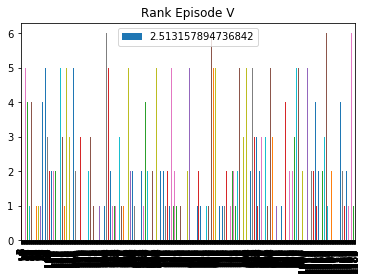

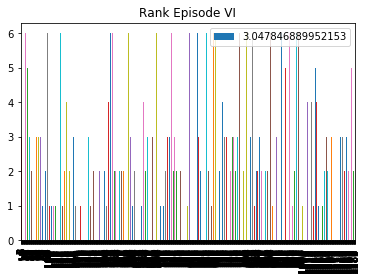

In [238]:
#We are transforming the strings in the columns 'rank(1-6)_ep1/6' to numbers (float) and plotting the bar plots of each column.

bar_plots_titles=['Rank Episode I','Rank Episode II','Rank Episode III','Rank Episode IV','Rank Episode V','Rank Episode VI']
rank_cols=['rank(1-6)_ep1','rank(1-6)_ep2','rank(1-6)_ep3','rank(1-6)_ep4','rank(1-6)_ep5','rank(1-6)_ep6']

for a in range(6):
    star_wars[rank_cols[a]]=pd.to_numeric(star_wars[rank_cols[a]],errors='coerce')
    star_wars.plot.bar(y=rank_cols[a], label=star_wars[rank_cols[a]].mean(), title=bar_plots_titles[a])
    plt.show()

Well, from the bar plots (where we labelled the mean rank for every movie) it is evident that the most liked movie of the Star Wars saga is the Episode V (The Empire Strikes Back, mean=2.51) followed by the VI (Return of the Jedi, mean=3.04), the IV (A New Hope, mean=3.27), the I (The Phantom Menace, mean=3.73), the II (Attack of the Clones, mean=4.08) and the III (Revenge of the Sith, mean=4.34). So it is clear that fans like more the first trilogy (IV, V and VI, mean=2.94) than the second (I, II and III, mean=4.05).
Let's have a look at what percentages have seen the different titles. 


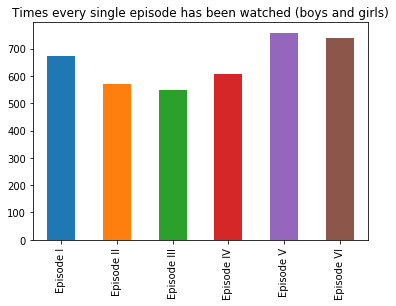

In [239]:
#Let's create a bar plot showing how many people watched every single movie of the two trilogies.

seen_sums=[star_wars['seen_ep1'].sum(), star_wars['seen_ep2'].sum(),star_wars['seen_ep3'].sum(),star_wars['seen_ep4'].sum(),star_wars['seen_ep5'].sum(),star_wars['seen_ep6'].sum()]
seen_sums=pd.Series(seen_sums)

seen_sums.rename({0:'Episode I', 1:'Episode II', 2:'Episode III', 3:'Episode IV', 4:'Episode V', 5:'Episode VI'}, axis=0,inplace=True)
seen_sums.plot.bar(title='Times every single episode has been watched (boys and girls)')
plt.show()

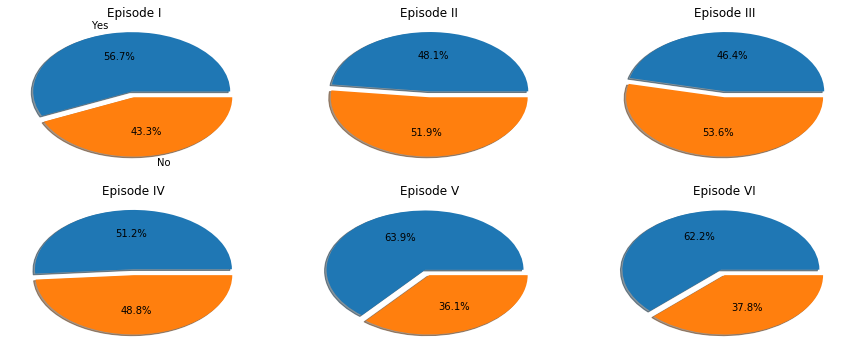

In [260]:
#We are creating lists of percentages of people who did/didn't watch every single episode

pie_ep1={'Yes':star_wars['seen_ep1'].sum(),'No':(1186-star_wars['seen_ep1'].sum())}
pie_ep2={'Yes':star_wars['seen_ep2'].sum(),'No':(1186-star_wars['seen_ep2'].sum())}
pie_ep3={'Yes':star_wars['seen_ep3'].sum(),'No':(1186-star_wars['seen_ep3'].sum())}
pie_ep4={'Yes':star_wars['seen_ep4'].sum(),'No':(1186-star_wars['seen_ep4'].sum())}
pie_ep5={'Yes':star_wars['seen_ep5'].sum(),'No':(1186-star_wars['seen_ep5'].sum())}
pie_ep6={'Yes':star_wars['seen_ep6'].sum(),'No':(1186-star_wars['seen_ep6'].sum())}


#Trasforming lists into pandas series
pie_ep1=pd.Series(pie_ep1)
pie_ep2=pd.Series(pie_ep2)
pie_ep3=pd.Series(pie_ep3)
pie_ep4=pd.Series(pie_ep4)
pie_ep5=pd.Series(pie_ep5)
pie_ep6=pd.Series(pie_ep6)

#Creating a single pandas dataframe from the series
pies=pd.DataFrame(pie_ep1,columns=['Episode I'])
pies['Episode II']=pie_ep2
pies['Episode III']=pie_ep3
pies['Episode IV']=pie_ep4
pies['Episode V']=pie_ep5
pies['Episode VI']=pie_ep6
pies

#pies.plot.pie(subplots=True, figsize=(15,3), legend=False, title='Percentages of people who have seen the movies (boys and girls)')
titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(pies[titles[d]],labels=pies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(pies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()




The most seen movies are, in order, the V, the VI, the I, the IV, the II and the III (as visible also in the pie plots). We would expect this bar plot to reflect the chart of the most liked movies of the saga but we find a curious situation. If the first and the last two positions reflect, indeed, the trend of the 'most liked' chart, the third and the fourth positions appear to be switched, which means that even if the audience liked more the 4th episode, it watched more the 3rd. The explanation to this inversion lies behind the fact that while the two trilogies (IV:1977, V:1980, VI:1983 and I:1999, II:2002, III:2005) came out in a time span of 6 years (1977-1983 and 1999-2005), 16 years have passed between the third (Ep VI) and the fourth (Ep I) film, thus letting the expectation of the audience grow so much that, even if 'Episode I' wasn't as nice as 'Episode IV', the former was watched more times than the latter.
This results apply to a group of 1186 people, 549 girls (46.3%) and 497 boys (41.9%). Unfortunately we don't know the gender of 140 people.
(Percentages of the pie plots:
-Ep I: 56.7-43.2 (Y-N)
-Ep II: 48.1-51.9
-Ep III: 46.4-53.6
-Ep IV: 51.2-48.8
-Ep V: 64-36
-Ep VI: 62.2-37.8)

Now let's consider the trends gender-wise and age-wise.

In [193]:
#Let's create a sub data set for boys and one for girls.

females=star_wars[star_wars['gender']=='F']
males=star_wars[star_wars['gender']=='M']

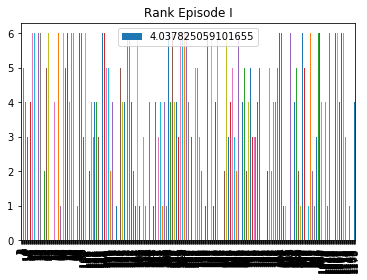

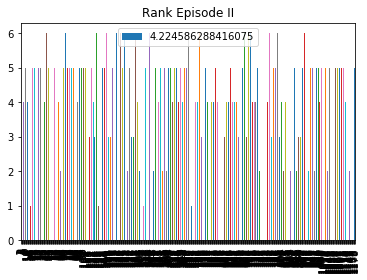

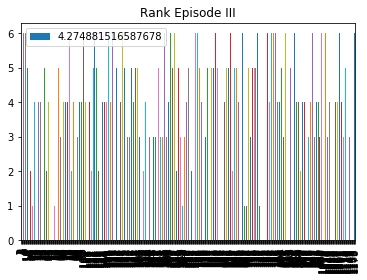

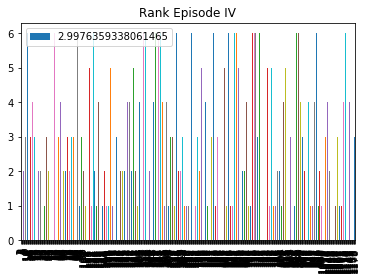

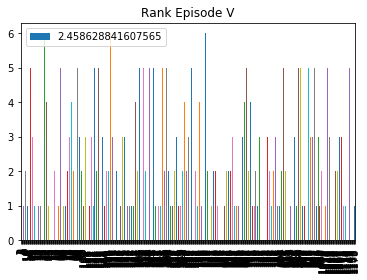

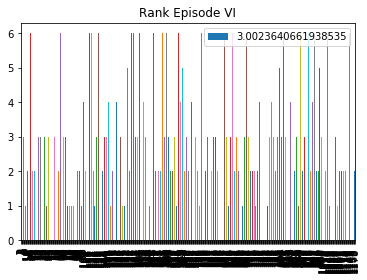

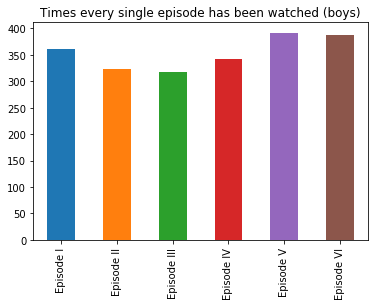

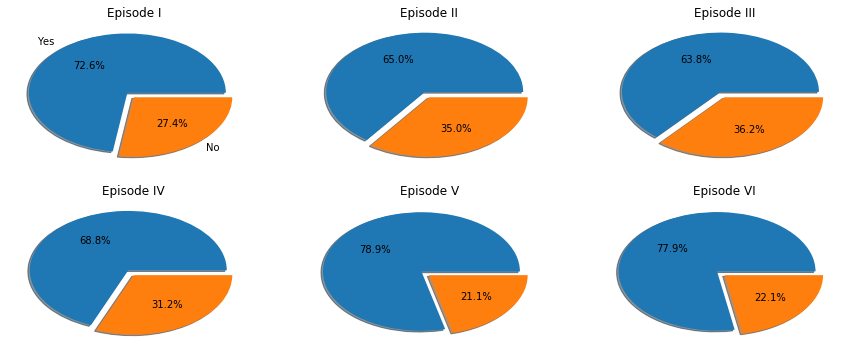

In [261]:
#Result for boys (497):

bar_plots_titles=['Rank Episode I','Rank Episode II','Rank Episode III','Rank Episode IV','Rank Episode V','Rank Episode VI']
rank_cols=['rank(1-6)_ep1','rank(1-6)_ep2','rank(1-6)_ep3','rank(1-6)_ep4','rank(1-6)_ep5','rank(1-6)_ep6']

for a in range(6):
    males.plot.bar(y=rank_cols[a], label=males[rank_cols[a]].mean(), title=bar_plots_titles[a])
    plt.show()



seen_males=[males['seen_ep1'].sum(), males['seen_ep2'].sum(),males['seen_ep3'].sum(),males['seen_ep4'].sum(),males['seen_ep5'].sum(),males['seen_ep6'].sum()]
seen_males=pd.Series(seen_males)

seen_males.rename({0:'Episode I', 1:'Episode II', 2:'Episode III', 3:'Episode IV', 4:'Episode V', 5:'Episode VI'}, axis=0,inplace=True)
#print(seen_sums)
seen_males.plot.bar(title='Times every single episode has been watched (boys)')
plt.show()

#We are creating lists of percentages of guys who did/didn't watch every single episode

mpie_ep1={'Yes':males['seen_ep1'].sum(),'No':(497-males['seen_ep1'].sum())}
mpie_ep2={'Yes':males['seen_ep2'].sum(),'No':(497-males['seen_ep2'].sum())}
mpie_ep3={'Yes':males['seen_ep3'].sum(),'No':(497-males['seen_ep3'].sum())}
mpie_ep4={'Yes':males['seen_ep4'].sum(),'No':(497-males['seen_ep4'].sum())}
mpie_ep5={'Yes':males['seen_ep5'].sum(),'No':(497-males['seen_ep5'].sum())}
mpie_ep6={'Yes':males['seen_ep6'].sum(),'No':(497-males['seen_ep6'].sum())}


#Trasforming lists into pandas series
mpie_ep1=pd.Series(mpie_ep1)
mpie_ep2=pd.Series(mpie_ep2)
mpie_ep3=pd.Series(mpie_ep3)
mpie_ep4=pd.Series(mpie_ep4)
mpie_ep5=pd.Series(mpie_ep5)
mpie_ep6=pd.Series(mpie_ep6)

#Creating a single pandas dataframe from the series
mpies=pd.DataFrame(mpie_ep1,columns=['Episode I'])
mpies['Episode II']=mpie_ep2
mpies['Episode III']=mpie_ep3
mpies['Episode IV']=mpie_ep4
mpies['Episode V']=mpie_ep5
mpies['Episode VI']=mpie_ep6

titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(mpies[titles[d]],labels=mpies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(mpies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()


In [203]:
mpies

,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI
Yes,361,323,317,342,392,387
No,136,174,180,155,105,110


The bar plots state that boys show a different trend from what we have seen in the mixed group. The chart of the most liked episodes is: V,IV,VI,I,II and III. What we immediately notice is that episode IV holds the 2nd position in the chart while in the mixed group it held the 4th position, which means that boys liked the episode IV even more than episodes VI and I. On the contrary, the chart of the most seen episodes by boys is exactly the same as the chart of the most seen episodes by the mixed group. 
Other important differences are visible in the pie plots where the percentages of guys having watched the episodes is higher than in the mixed group which means that more boys than girls have watched the movies (unsurprisingly).
(Percentages of the pie plots:
-Ep I: 72.6-27.4 (Y-N)
-Ep II: 65-35
-Ep III: 63.8-36.2
-Ep IV: 68.8-31.2
-Ep V: 78.9-21.1
-Ep VI: 77.9-22.1)


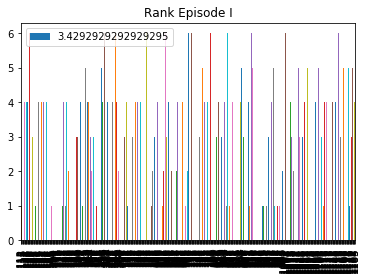

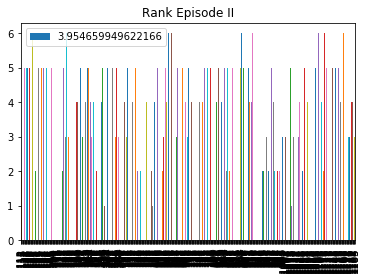

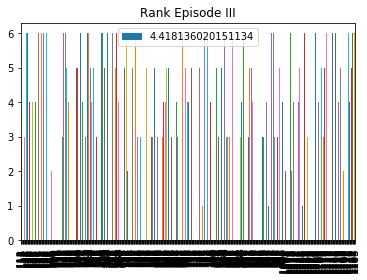

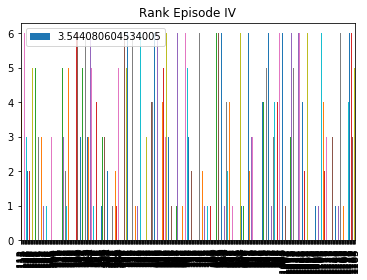

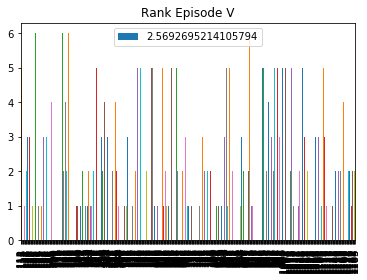

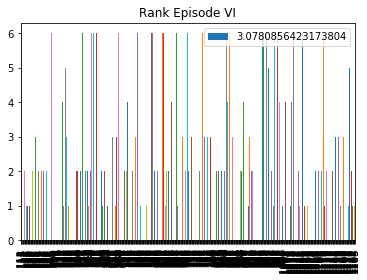

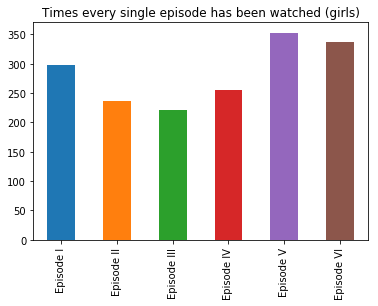

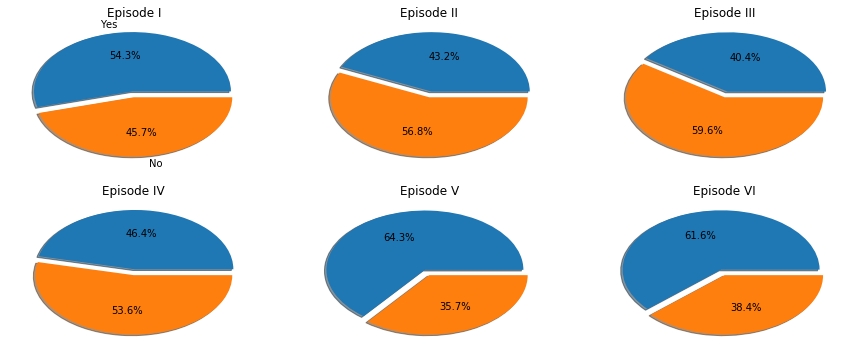

In [262]:
#Result for girls (549):

bar_plots_titles=['Rank Episode I','Rank Episode II','Rank Episode III','Rank Episode IV','Rank Episode V','Rank Episode VI']
rank_cols=['rank(1-6)_ep1','rank(1-6)_ep2','rank(1-6)_ep3','rank(1-6)_ep4','rank(1-6)_ep5','rank(1-6)_ep6']

for a in range(6):
    females.plot.bar(y=rank_cols[a], label=females[rank_cols[a]].mean(), title=bar_plots_titles[a])
    plt.show()



seen_females=[females['seen_ep1'].sum(), females['seen_ep2'].sum(),females['seen_ep3'].sum(),females['seen_ep4'].sum(),females['seen_ep5'].sum(),females['seen_ep6'].sum()]
seen_females=pd.Series(seen_females)

seen_females.rename({0:'Episode I', 1:'Episode II', 2:'Episode III', 3:'Episode IV', 4:'Episode V', 5:'Episode VI'}, axis=0,inplace=True)
#print(seen_sums)
seen_females.plot.bar(title='Times every single episode has been watched (girls)')
plt.show()

#We are creating lists of percentages of guys who did/didn't watch every single episode

fpie_ep1={'Yes':females['seen_ep1'].sum(),'No':(549-females['seen_ep1'].sum())}
fpie_ep2={'Yes':females['seen_ep2'].sum(),'No':(549-females['seen_ep2'].sum())}
fpie_ep3={'Yes':females['seen_ep3'].sum(),'No':(549-females['seen_ep3'].sum())}
fpie_ep4={'Yes':females['seen_ep4'].sum(),'No':(549-females['seen_ep4'].sum())}
fpie_ep5={'Yes':females['seen_ep5'].sum(),'No':(549-females['seen_ep5'].sum())}
fpie_ep6={'Yes':females['seen_ep6'].sum(),'No':(549-females['seen_ep6'].sum())}


#Trasforming lists into pandas series
fpie_ep1=pd.Series(fpie_ep1)
fpie_ep2=pd.Series(fpie_ep2)
fpie_ep3=pd.Series(fpie_ep3)
fpie_ep4=pd.Series(fpie_ep4)
fpie_ep5=pd.Series(fpie_ep5)
fpie_ep6=pd.Series(fpie_ep6)

#Creating a single pandas dataframe from the series
fpies=pd.DataFrame(fpie_ep1,columns=['Episode I'])
fpies['Episode II']=fpie_ep2
fpies['Episode III']=fpie_ep3
fpies['Episode IV']=fpie_ep4
fpies['Episode V']=fpie_ep5
fpies['Episode VI']=fpie_ep6

titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(fpies[titles[d]],labels=fpies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(fpies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()



In [206]:
fpies

,Episode I,Episode II,Episode III,Episode IV,Episode V,Episode VI
Yes,298,237,222,255,353,338
No,251,312,327,294,196,211


The girls' charts for the most liked and watched episodes are exactly the same as those regarding the mixed group: V, VI, I, IV, II and III. The pie plots show the following percentages:
-Ep I: 54.3-45.7 (Y-N)
-Ep II: 43.1-56.9
-Ep III: 40.4-59.6
-Ep IV: 46.4-53.6
-Ep V: 64.3-35.7
-Ep VI: 61.5-38.5)
So in this case the percentages of girls watching the single movies are considerably (~20%) lower than the ones regarding the group of guys but are pretty similar to the ones regarding the mixed group.
Infact, considering just the Yes(s) and watching the following bar plots:
EpI:T56.7/M72.6/F54.3
EpII:T48.1/M65/F43.1
EpIII:T46.4/M63.7/F40.4
EpIV:T51.2/M68.8/F46.4
EpV:T64/M78.9/F64.3
EpVI:T62.2/M77.8/F61.5

This has one single explanation: A very low percentage of the people whose gender we don't know (and that must be males) and have filled the questionaire (140) must have watched the episodes. That would also explain why they didn't fill out the gender field, probably they were not interested in the survey and did it with superficiality.

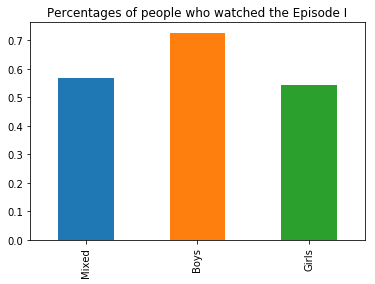

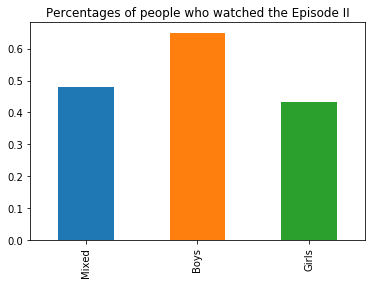

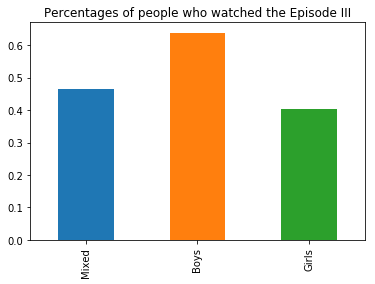

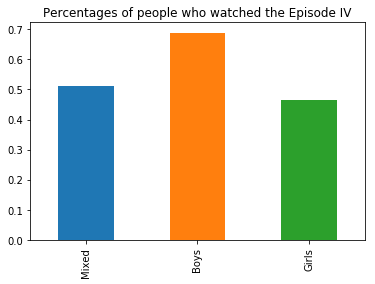

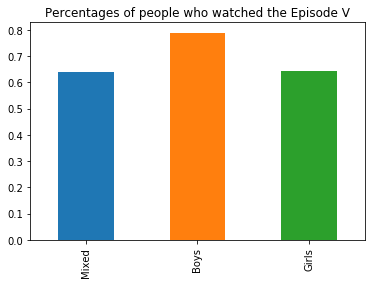

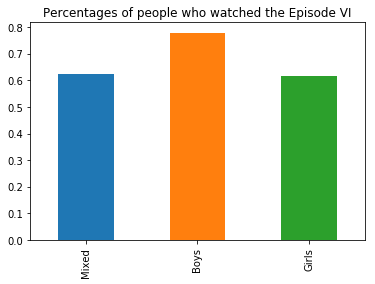

In [270]:


percentages_ep1={'Mixed':(pies.loc['Yes','Episode I']/1186),'Boys':(mpies.loc['Yes','Episode I']/497), 'Girls':(fpies.loc['Yes','Episode I']/549)}
percentages_ep2={'Mixed':(pies.loc['Yes','Episode II']/1186),'Boys':(mpies.loc['Yes','Episode II']/497), 'Girls':(fpies.loc['Yes','Episode II']/549)}
percentages_ep3={'Mixed':(pies.loc['Yes','Episode III']/1186),'Boys':(mpies.loc['Yes','Episode III']/497), 'Girls':(fpies.loc['Yes','Episode III']/549)}
percentages_ep4={'Mixed':(pies.loc['Yes','Episode IV']/1186),'Boys':(mpies.loc['Yes','Episode IV']/497), 'Girls':(fpies.loc['Yes','Episode IV']/549)}
percentages_ep5={'Mixed':(pies.loc['Yes','Episode V']/1186),'Boys':(mpies.loc['Yes','Episode V']/497), 'Girls':(fpies.loc['Yes','Episode V']/549)}
percentages_ep6={'Mixed':(pies.loc['Yes','Episode VI']/1186),'Boys':(mpies.loc['Yes','Episode VI']/497), 'Girls':(fpies.loc['Yes','Episode VI']/549)}

percentages_ep1=pd.Series(percentages_ep1)
percentages_ep2=pd.Series(percentages_ep2)
percentages_ep3=pd.Series(percentages_ep3)
percentages_ep4=pd.Series(percentages_ep4)
percentages_ep5=pd.Series(percentages_ep5)
percentages_ep6=pd.Series(percentages_ep6)

percentages=pd.DataFrame(percentages_ep1,columns=['Episode I'])
percentages['Episode II']=percentages_ep2
percentages['Episode III']=percentages_ep3
percentages['Episode IV']=percentages_ep4
percentages['Episode V']=percentages_ep5
percentages['Episode VI']=percentages_ep6


percentages.plot.bar(y='Episode I',legend=False, title='Percentages of people who watched the Episode I')
percentages.plot.bar(y='Episode II',legend=False, title='Percentages of people who watched the Episode II')
percentages.plot.bar(y='Episode III',legend=False, title='Percentages of people who watched the Episode III')
percentages.plot.bar(y='Episode IV',legend=False, title='Percentages of people who watched the Episode IV')
percentages.plot.bar(y='Episode V',legend=False, title='Percentages of people who watched the Episode V')
percentages.plot.bar(y='Episode VI',legend=False, title='Percentages of people who watched the Episode VI')
plt.show()


###############################################
#I tried using matplotlib.pyplot
#titles=['Episode I','Episode II',
#       'Episode III', 'Episode IV',
#       'Episode V', 'Episode VI']
#from numpy import arange
#bar_pos=arange(3)+1
#tick_positions=range(1,4)
#fig=plt.figure(figsize=(15,6))
#for d in range(6):
#    ax=fig.add_subplot(2,3,d+1)
#    ax.bar(bar_pos,percentages[titles[d]],width=0.3)
#    ax.set_xticks(tick_positions)
#    ax.set_xlabel(percentages.index.values)
#plt.show()
#################################################

In [293]:
#Let's try to consider the trends depending on the age.


youngsters=star_wars[star_wars['age']=='18-29']
adults=star_wars[star_wars['age']=='30-44']
mid_ages=star_wars[star_wars['age']=='45-60']
oldies=star_wars[star_wars['age']=='> 60']
oldies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 82 to 1186
Data columns (total 38 columns):
ID                      269 non-null float64
seen_any_movie          269 non-null bool
fan                     193 non-null object
seen_ep1                269 non-null bool
seen_ep2                269 non-null bool
seen_ep3                269 non-null bool
seen_ep4                269 non-null bool
seen_ep5                269 non-null bool
seen_ep6                269 non-null bool
rank(1-6)_ep1           192 non-null float64
rank(1-6)_ep2           193 non-null float64
rank(1-6)_ep3           193 non-null float64
rank(1-6)_ep4           193 non-null float64
rank(1-6)_ep5           193 non-null float64
rank(1-6)_ep6           193 non-null float64
relation_w_han          191 non-null object
relation_w_luke         193 non-null object
relation_w_leia         192 non-null object
relation_w_anakin       185 non-null object
relation_w_obi          190 non-null object
relation_w_palpatine

young ep1: 4.1 young ep2: 4.1 young ep3: 3.966666666666667 young ep4: 2.9944444444444445 young ep5: 2.7222222222222223 young ep6: 3.1166666666666667
adults ep1: 4.3478260869565215 adults ep2: 4.309178743961352 adults ep3: 4.475728155339806 adults ep4: 2.9323671497584543 adults ep5: 2.21256038647343 adults ep6: 2.714975845410628
mid_ages ep1: 3.5416666666666665 mid_ages ep2: 4.170833333333333 mid_ages ep3: 4.5375 mid_ages ep4: 3.308333333333333 mid_ages ep5: 2.4375 mid_ages ep6: 3.004166666666667
oldies ep1: 3.0104166666666665 oldies ep2: 3.761658031088083 oldies ep3: 4.316062176165803 oldies ep4: 3.8082901554404147 oldies ep5: 2.7305699481865284 oldies ep6: 3.3575129533678756


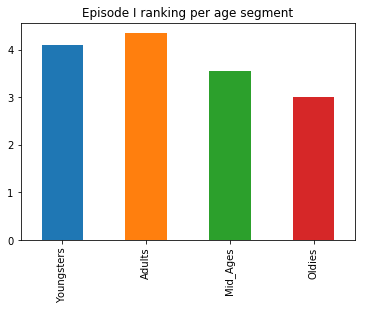

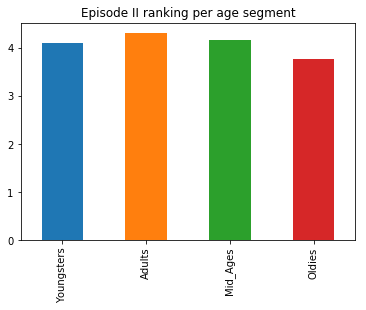

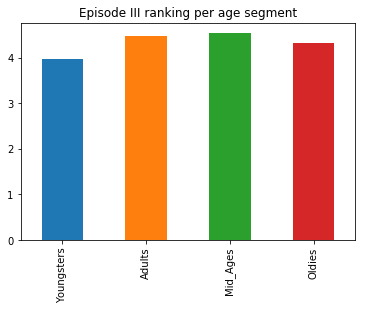

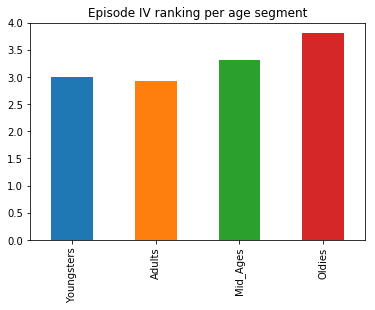

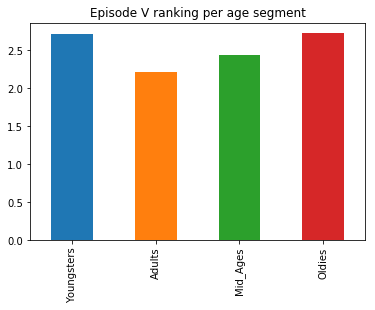

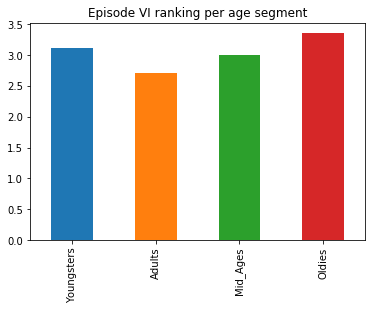

In [286]:
print('young ep1:',youngsters['rank(1-6)_ep1'].mean(),'young ep2:',youngsters['rank(1-6)_ep2'].mean(),
     'young ep3:',youngsters['rank(1-6)_ep3'].mean(), 'young ep4:',youngsters['rank(1-6)_ep4'].mean(),
     'young ep5:',youngsters['rank(1-6)_ep5'].mean(), 'young ep6:',youngsters['rank(1-6)_ep6'].mean(),)

print('adults ep1:',adults['rank(1-6)_ep1'].mean(),'adults ep2:',adults['rank(1-6)_ep2'].mean(),
     'adults ep3:',adults['rank(1-6)_ep3'].mean(), 'adults ep4:',adults['rank(1-6)_ep4'].mean(),
     'adults ep5:',adults['rank(1-6)_ep5'].mean(), 'adults ep6:',adults['rank(1-6)_ep6'].mean(),)

print('mid_ages ep1:',mid_ages['rank(1-6)_ep1'].mean(),'mid_ages ep2:',mid_ages['rank(1-6)_ep2'].mean(),
     'mid_ages ep3:',mid_ages['rank(1-6)_ep3'].mean(), 'mid_ages ep4:',mid_ages['rank(1-6)_ep4'].mean(),
     'mid_ages ep5:',mid_ages['rank(1-6)_ep5'].mean(), 'mid_ages ep6:',mid_ages['rank(1-6)_ep6'].mean(),)

print('oldies ep1:',oldies['rank(1-6)_ep1'].mean(),'oldies ep2:',oldies['rank(1-6)_ep2'].mean(),
     'oldies ep3:',oldies['rank(1-6)_ep3'].mean(), 'oldies ep4:',oldies['rank(1-6)_ep4'].mean(),
     'oldies ep5:',oldies['rank(1-6)_ep5'].mean(), 'oldies ep6:',oldies['rank(1-6)_ep6'].mean(),)


app_ep1={'Youngsters':youngsters['rank(1-6)_ep1'].mean(), 'Adults':adults['rank(1-6)_ep1'].mean(),
         'Mid_Ages':mid_ages['rank(1-6)_ep1'].mean(), 'Oldies':oldies['rank(1-6)_ep1'].mean()}
app_ep2={'Youngsters':youngsters['rank(1-6)_ep2'].mean(), 'Adults':adults['rank(1-6)_ep2'].mean(),
         'Mid_Ages':mid_ages['rank(1-6)_ep2'].mean(), 'Oldies':oldies['rank(1-6)_ep2'].mean()}
app_ep3={'Youngsters':youngsters['rank(1-6)_ep3'].mean(), 'Adults':adults['rank(1-6)_ep3'].mean(),
         'Mid_Ages':mid_ages['rank(1-6)_ep3'].mean(), 'Oldies':oldies['rank(1-6)_ep3'].mean()}
app_ep4={'Youngsters':youngsters['rank(1-6)_ep4'].mean(), 'Adults':adults['rank(1-6)_ep4'].mean(),
         'Mid_Ages':mid_ages['rank(1-6)_ep4'].mean(), 'Oldies':oldies['rank(1-6)_ep4'].mean()}
app_ep5={'Youngsters':youngsters['rank(1-6)_ep5'].mean(), 'Adults':adults['rank(1-6)_ep5'].mean(),
         'Mid_Ages':mid_ages['rank(1-6)_ep5'].mean(), 'Oldies':oldies['rank(1-6)_ep5'].mean()}
app_ep6={'Youngsters':youngsters['rank(1-6)_ep6'].mean(), 'Adults':adults['rank(1-6)_ep6'].mean(),
         'Mid_Ages':mid_ages['rank(1-6)_ep6'].mean(), 'Oldies':oldies['rank(1-6)_ep6'].mean()}

app_ep1=pd.Series(app_ep1)
app_ep2=pd.Series(app_ep2)
app_ep3=pd.Series(app_ep3)
app_ep4=pd.Series(app_ep4)
app_ep5=pd.Series(app_ep5)
app_ep6=pd.Series(app_ep6)

appreciation=pd.DataFrame(app_ep1,columns=['Episode I'])
appreciation['Episode II']=app_ep2
appreciation['Episode III']=app_ep3
appreciation['Episode IV']=app_ep4
appreciation['Episode V']=app_ep5
appreciation['Episode VI']=app_ep6

appreciation.plot.bar(y='Episode I',legend=False, title='Episode I ranking per age segment')
appreciation.plot.bar(y='Episode II',legend=False, title='Episode II ranking per age segment')
appreciation.plot.bar(y='Episode III',legend=False, title='Episode III ranking per age segment')
appreciation.plot.bar(y='Episode IV',legend=False, title='Episode IV ranking per age segment')
appreciation.plot.bar(y='Episode V',legend=False, title='Episode V ranking per age segment')
appreciation.plot.bar(y='Episode VI',legend=False, title='Episode VI ranking per age segment')
plt.show()

Preference charts for:
Youngsters (18-29): V, IV, VI, III, I and II
Adults (30-44): V, VI, IV, II, I and III
Mid-Ages (45-60): V, VI, IV, I, II and III
Oldies (> 60): V, I, VI, II, IV and III

So it emerges that while the V episode was the most liked by all ages, youngsters liked more the IV over the VI while it is the other way around for adults and mid-ages. The episodes I, II and III are the least appreciated ones by people less than 60 years old.
People in their 60s and beyond demonstrate to appreciate also the second trilogy and specifically they liked the Episode I over the VI and IV.
Moreover, as a general conclusion, we can state that if the V episode is the most appreciated, the III is the least almost in all the cases analyzed.

Finally, looking at the bar plots, we see that the age segment the appreciated the most the first trilogy is the adults' one, while oldies have liked the most the first two episodes of the second trilogy. The only exception is the third episode of the second trilogy which was appreciated the most by youngsters.

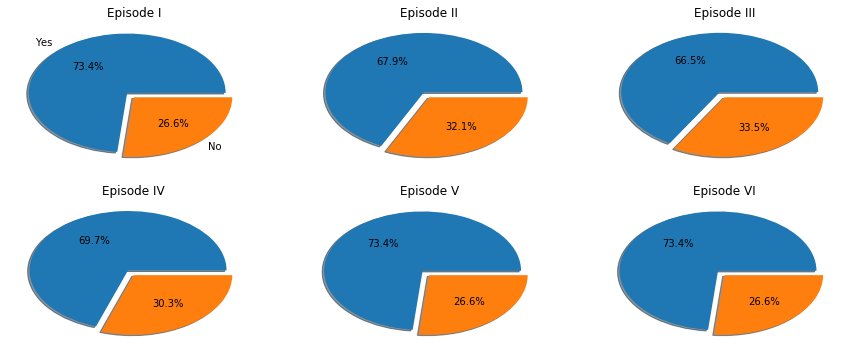

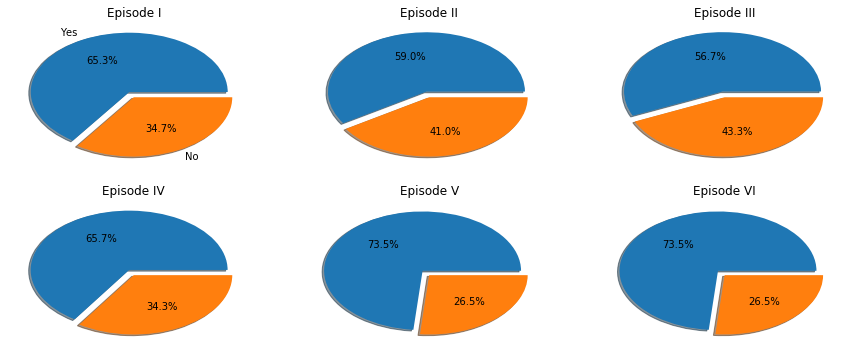

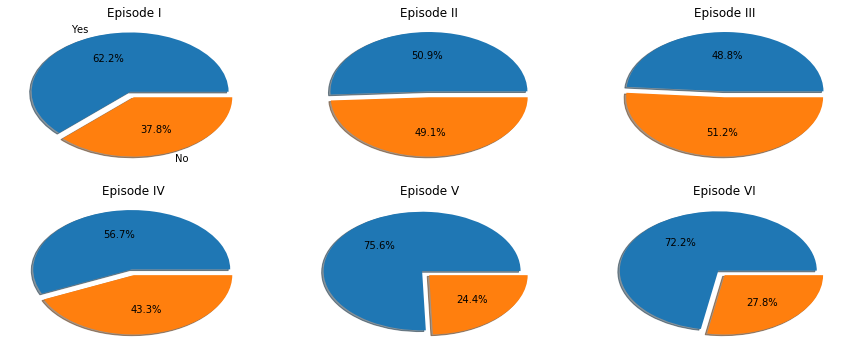

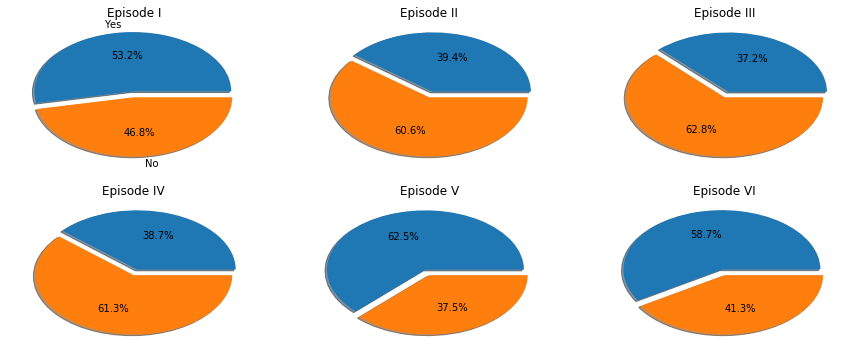

In [294]:
#We are creating lists of percentages of youngsters who did/didn't watch every single episode

ypie_ep1={'Yes':youngsters['seen_ep1'].sum(),'No':(218-youngsters['seen_ep1'].sum())}
ypie_ep2={'Yes':youngsters['seen_ep2'].sum(),'No':(218-youngsters['seen_ep2'].sum())}
ypie_ep3={'Yes':youngsters['seen_ep3'].sum(),'No':(218-youngsters['seen_ep3'].sum())}
ypie_ep4={'Yes':youngsters['seen_ep4'].sum(),'No':(218-youngsters['seen_ep4'].sum())}
ypie_ep5={'Yes':youngsters['seen_ep5'].sum(),'No':(218-youngsters['seen_ep5'].sum())}
ypie_ep6={'Yes':youngsters['seen_ep6'].sum(),'No':(218-youngsters['seen_ep6'].sum())}


#Trasforming lists into pandas series
ypie_ep1=pd.Series(ypie_ep1)
ypie_ep2=pd.Series(ypie_ep2)
ypie_ep3=pd.Series(ypie_ep3)
ypie_ep4=pd.Series(ypie_ep4)
ypie_ep5=pd.Series(ypie_ep5)
ypie_ep6=pd.Series(ypie_ep6)

#Creating a single pandas dataframe from the series
ypies=pd.DataFrame(ypie_ep1,columns=['Episode I'])
ypies['Episode II']=ypie_ep2
ypies['Episode III']=ypie_ep3
ypies['Episode IV']=ypie_ep4
ypies['Episode V']=ypie_ep5
ypies['Episode VI']=ypie_ep6

titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(ypies[titles[d]],labels=ypies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(ypies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()


#We are creating lists of percentages of adults who did/didn't watch every single episode

apie_ep1={'Yes':adults['seen_ep1'].sum(),'No':(268-adults['seen_ep1'].sum())}
apie_ep2={'Yes':adults['seen_ep2'].sum(),'No':(268-adults['seen_ep2'].sum())}
apie_ep3={'Yes':adults['seen_ep3'].sum(),'No':(268-adults['seen_ep3'].sum())}
apie_ep4={'Yes':adults['seen_ep4'].sum(),'No':(268-adults['seen_ep4'].sum())}
apie_ep5={'Yes':adults['seen_ep5'].sum(),'No':(268-adults['seen_ep5'].sum())}
apie_ep6={'Yes':adults['seen_ep6'].sum(),'No':(268-adults['seen_ep6'].sum())}


#Trasforming lists into pandas series
apie_ep1=pd.Series(apie_ep1)
apie_ep2=pd.Series(apie_ep2)
apie_ep3=pd.Series(apie_ep3)
apie_ep4=pd.Series(apie_ep4)
apie_ep5=pd.Series(apie_ep5)
apie_ep6=pd.Series(apie_ep6)

#Creating a single pandas dataframe from the series
apies=pd.DataFrame(apie_ep1,columns=['Episode I'])
apies['Episode II']=apie_ep2
apies['Episode III']=apie_ep3
apies['Episode IV']=apie_ep4
apies['Episode V']=apie_ep5
apies['Episode VI']=apie_ep6

titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(apies[titles[d]],labels=apies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(apies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()

#We are creating lists of percentages of mid-ages who did/didn't watch every single episode

mapie_ep1={'Yes':mid_ages['seen_ep1'].sum(),'No':(291-mid_ages['seen_ep1'].sum())}
mapie_ep2={'Yes':mid_ages['seen_ep2'].sum(),'No':(291-mid_ages['seen_ep2'].sum())}
mapie_ep3={'Yes':mid_ages['seen_ep3'].sum(),'No':(291-mid_ages['seen_ep3'].sum())}
mapie_ep4={'Yes':mid_ages['seen_ep4'].sum(),'No':(291-mid_ages['seen_ep4'].sum())}
mapie_ep5={'Yes':mid_ages['seen_ep5'].sum(),'No':(291-mid_ages['seen_ep5'].sum())}
mapie_ep6={'Yes':mid_ages['seen_ep6'].sum(),'No':(291-mid_ages['seen_ep6'].sum())}


#Trasforming lists into pandas series
mapie_ep1=pd.Series(mapie_ep1)
mapie_ep2=pd.Series(mapie_ep2)
mapie_ep3=pd.Series(mapie_ep3)
mapie_ep4=pd.Series(mapie_ep4)
mapie_ep5=pd.Series(mapie_ep5)
mapie_ep6=pd.Series(mapie_ep6)

#Creating a single pandas dataframe from the series
mapies=pd.DataFrame(mapie_ep1,columns=['Episode I'])
mapies['Episode II']=mapie_ep2
mapies['Episode III']=mapie_ep3
mapies['Episode IV']=mapie_ep4
mapies['Episode V']=mapie_ep5
mapies['Episode VI']=mapie_ep6

titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(mapies[titles[d]],labels=mapies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(mapies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()




#We are creating lists of percentages of oldies who did/didn't watch every single episode

opie_ep1={'Yes':oldies['seen_ep1'].sum(),'No':(269-oldies['seen_ep1'].sum())}
opie_ep2={'Yes':oldies['seen_ep2'].sum(),'No':(269-oldies['seen_ep2'].sum())}
opie_ep3={'Yes':oldies['seen_ep3'].sum(),'No':(269-oldies['seen_ep3'].sum())}
opie_ep4={'Yes':oldies['seen_ep4'].sum(),'No':(269-oldies['seen_ep4'].sum())}
opie_ep5={'Yes':oldies['seen_ep5'].sum(),'No':(269-oldies['seen_ep5'].sum())}
opie_ep6={'Yes':oldies['seen_ep6'].sum(),'No':(269-oldies['seen_ep6'].sum())}


#Trasforming lists into pandas series
opie_ep1=pd.Series(opie_ep1)
opie_ep2=pd.Series(opie_ep2)
opie_ep3=pd.Series(opie_ep3)
opie_ep4=pd.Series(opie_ep4)
opie_ep5=pd.Series(opie_ep5)
opie_ep6=pd.Series(opie_ep6)

#Creating a single pandas dataframe from the series
opies=pd.DataFrame(opie_ep1,columns=['Episode I'])
opies['Episode II']=opie_ep2
opies['Episode III']=opie_ep3
opies['Episode IV']=opie_ep4
opies['Episode V']=opie_ep5
opies['Episode VI']=opie_ep6

titles=['Episode I','Episode II',
       'Episode III', 'Episode IV',
       'Episode V', 'Episode VI']

fig=plt.figure(figsize=(15,6))
explode = (0.1, 0)
for d in range(6):
    ax=fig.add_subplot(2,3,d+1)
    if d==0:
        ax.pie(opies[titles[d]],labels=opies.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
    if d>0:
        ax.pie(opies[titles[d]],autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(titles[d])
plt.show()



Looking at these pie charts above; in order for Youngsters, Adults, Mid-Ages and Oldies; it unsurprisingly appears that the greatest percentage of an "age-segment" that watched the episodes I-IV belongs to the Youngsters.
It is still not surprising to observe that the highest percentage for the V episode belongs to the Mid-Ages, and the highest percentage for the VI episode belongs to the Adults (even if it is almost the same as the Youngsters' one).

In [296]:
#Splitting the DF education wise.

less_high=star_wars[star_wars['education']=='Less than high school degree']
high=star_wars[star_wars['education']=='High school degree']
grad=star_wars[star_wars['education']=='Graduate degree']
bach=star_wars[star_wars['education']=='Bachelor degree']
coll=star_wars[star_wars['education']=='Some college or Associate degree']
star_wars['education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: education, dtype: int64

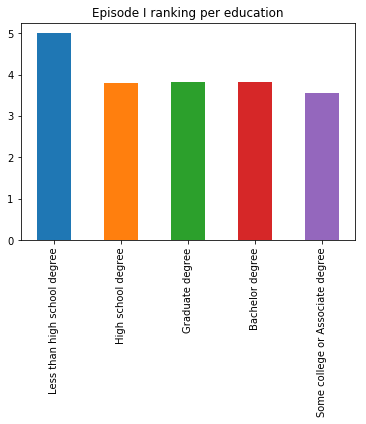

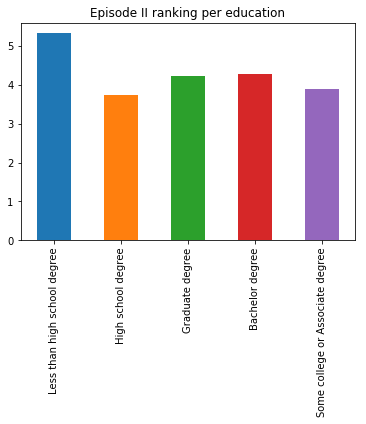

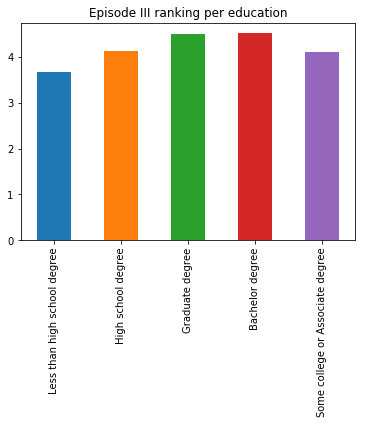

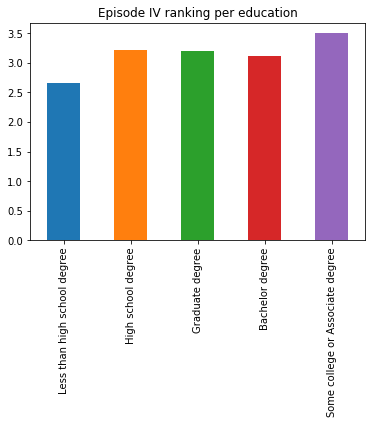

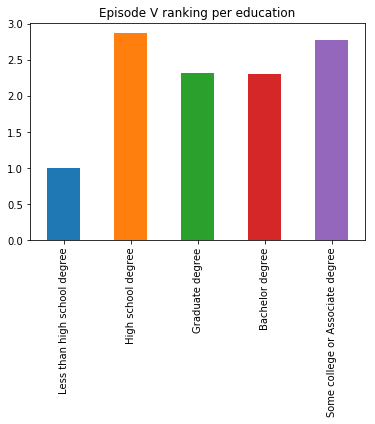

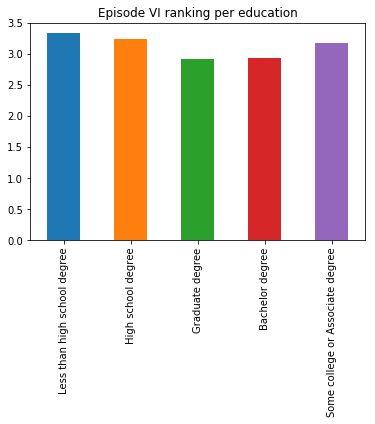

In [298]:
#Plotting appreciation per education

ape_ep1={'Less than high school degree':less_high['rank(1-6)_ep1'].mean(), 'High school degree':high['rank(1-6)_ep1'].mean(),
         'Graduate degree':grad['rank(1-6)_ep1'].mean(), 'Bachelor degree':bach['rank(1-6)_ep1'].mean(), 
         'Some college or Associate degree':coll['rank(1-6)_ep1'].mean()}
ape_ep2={'Less than high school degree':less_high['rank(1-6)_ep2'].mean(), 'High school degree':high['rank(1-6)_ep2'].mean(),
         'Graduate degree':grad['rank(1-6)_ep2'].mean(), 'Bachelor degree':bach['rank(1-6)_ep2'].mean(),
        'Some college or Associate degree':coll['rank(1-6)_ep2'].mean()}
ape_ep3={'Less than high school degree':less_high['rank(1-6)_ep3'].mean(), 'High school degree':high['rank(1-6)_ep3'].mean(),
         'Graduate degree':grad['rank(1-6)_ep3'].mean(), 'Bachelor degree':bach['rank(1-6)_ep3'].mean(),
        'Some college or Associate degree':coll['rank(1-6)_ep3'].mean()}
ape_ep4={'Less than high school degree':less_high['rank(1-6)_ep4'].mean(), 'High school degree':high['rank(1-6)_ep4'].mean(),
         'Graduate degree':grad['rank(1-6)_ep4'].mean(), 'Bachelor degree':bach['rank(1-6)_ep4'].mean(),
        'Some college or Associate degree':coll['rank(1-6)_ep4'].mean()}
ape_ep5={'Less than high school degree':less_high['rank(1-6)_ep5'].mean(), 'High school degree':high['rank(1-6)_ep5'].mean(),
         'Graduate degree':grad['rank(1-6)_ep5'].mean(), 'Bachelor degree':bach['rank(1-6)_ep5'].mean(),
        'Some college or Associate degree':coll['rank(1-6)_ep5'].mean()}
ape_ep6={'Less than high school degree':less_high['rank(1-6)_ep6'].mean(), 'High school degree':high['rank(1-6)_ep6'].mean(),
         'Graduate degree':grad['rank(1-6)_ep6'].mean(), 'Bachelor degree':bach['rank(1-6)_ep6'].mean(),
        'Some college or Associate degree':coll['rank(1-6)_ep6'].mean()}

ape_ep1=pd.Series(ape_ep1)
ape_ep2=pd.Series(ape_ep2)
ape_ep3=pd.Series(ape_ep3)
ape_ep4=pd.Series(ape_ep4)
ape_ep5=pd.Series(ape_ep5)
ape_ep6=pd.Series(ape_ep6)

appperedu=pd.DataFrame(ape_ep1,columns=['Episode I'])
appperedu['Episode II']=ape_ep2
appperedu['Episode III']=ape_ep3
appperedu['Episode IV']=ape_ep4
appperedu['Episode V']=ape_ep5
appperedu['Episode VI']=ape_ep6

appperedu.plot.bar(y='Episode I',legend=False, title='Episode I ranking per education')
appperedu.plot.bar(y='Episode II',legend=False, title='Episode II ranking per education')
appperedu.plot.bar(y='Episode III',legend=False, title='Episode III ranking per education')
appperedu.plot.bar(y='Episode IV',legend=False, title='Episode IV ranking per education')
appperedu.plot.bar(y='Episode V',legend=False, title='Episode V ranking per education')
appperedu.plot.bar(y='Episode VI',legend=False, title='Episode VI ranking per education')
plt.show()

The difference in the ratings doesn't seem to be affected by the education of the viewer for the episodes VI, IV and III (the maximum offset between the different bars in each plot is max 1/6).
The difference in the ratings is way stronger for the episodes I, II and V.
In the first two cases people with 'less than high school degree' have openly disliked them showing an offset between their bar and the other educations' ones of ~1.3 in both cases.
The case of the episode V is very peculiar. Infact, if people with education 'higher than high school degree' have shown an average appreciation of ~2.5, people interviewed that haven't completed high school assigned an average mark of ~1 showing the largest difference in the offsets (~1.5).

In [301]:
star_wars['who_shot_first'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: who_shot_first, dtype: int64

37% of the people who answered the question "Who shot first?", didn't understand it.
23.8% answered Greedo
39.2% answered Han Solo
358 people (30% of all the people interviewed) didn't answer the question.


In [314]:
star_wars_copy=star_wars
cols=['relation_w_han', 'relation_w_luke', 'relation_w_leia', 'relation_w_anakin', 'relation_w_obi',
                 'relation_w_palpatine', 'relation_w_vader', 'relation_w_lando', 'relation_w_boba',
                 'relation_w_c-3p0', 'relation_w_r2d2', 'relation_w_jarjar', 'relation_w_padme','relation_w_yoda']

corrections_3={'Very favorably':'Positive', 'Somewhat favorably':'Positive', 'Neither favorably nor unfavorably (neutral)':'Neutral',
             'Unfamiliar (N/A)':'N/A', 'Somewhat unfavorably':'Negative', 'Very unfavorably':'Negative'}

for c in range(14):
    star_wars_copy[cols[c]]=star_wars[cols[c]].map(corrections_3)

star_wars_copy[cols].head()

,relation_w_han,relation_w_luke,relation_w_leia,relation_w_anakin,relation_w_obi,relation_w_palpatine,relation_w_vader,relation_w_lando,relation_w_boba,relation_w_c-3p0,relation_w_r2d2,relation_w_jarjar,relation_w_padme,relation_w_yoda
1,Positive,Positive,Positive,Positive,Positive,Positive,Positive,N/A,N/A,Positive,Positive,Positive,Positive,Positive
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Positive,Positive,Positive,Positive,Positive,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Negative,Positive,Positive,Positive,Positive,Positive
5,Positive,Positive,Positive,Negative,Positive,Negative,Positive,Neutral,Positive,Positive,Positive,Negative,Positive,Positive


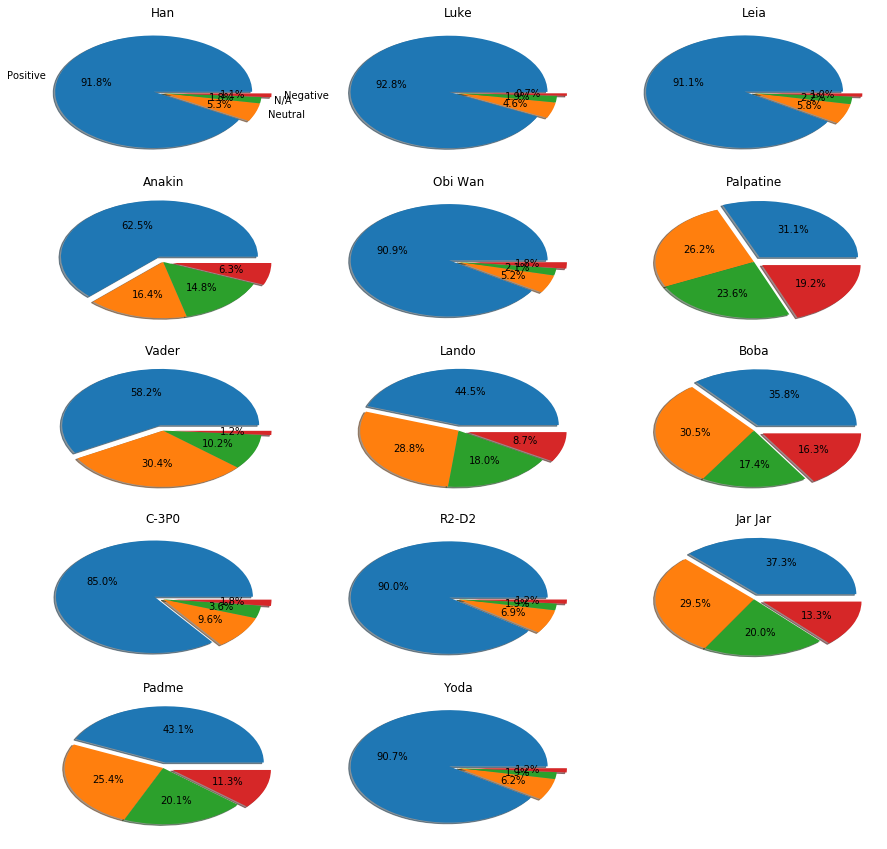

In [319]:
carachter=['Han', 'Luke', 'Leia', 'Anakin', 'Obi Wan', 'Palpatine', 'Vader', 'Lando', 'Boba', 'C-3P0', 'R2-D2','Jar Jar', 
           'Padme', 'Yoda']
cols=['relation_w_han', 'relation_w_luke', 'relation_w_leia', 'relation_w_anakin', 'relation_w_obi',
                 'relation_w_palpatine', 'relation_w_vader', 'relation_w_lando', 'relation_w_boba',
                 'relation_w_c-3p0', 'relation_w_r2d2', 'relation_w_jarjar', 'relation_w_padme','relation_w_yoda']

fig=plt.figure(figsize=(15,15))
explode = (0.1, 0,0,0.1)
for d in range(14):
    attitude=pd.Series()
    attitude=star_wars[cols[d]].value_counts()
    ax=fig.add_subplot(5,3,d+1)
    if d==0:
        ax.pie(attitude,labels=attitude.index,labeldistance=1.13,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(carachter[d])
    if d>0:
        ax.pie(attitude,autopct='%1.1f%%',explode=explode,shadow=True)
        ax.set_title(carachter[d])
plt.show()




So the most positive characters are, in order:
1 Luke 92.8%
2 Han 91.8
3 Leia 91.1
4 Obi Wan 90.9
5 Yoda 90.7
6 R2-D2 90
7 C-3P0 85

Curiously enough the most disliked character is not Vader (just 1.2% of negative sensation), as one could think, but Palpatine, being his red slice of the pie, the largest (19.2%). Palpatine is also the most controversial character, being his pie almost evenly divided in the four available slices.